In [477]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame and parse dates
file_path = '/Users/kreshnayogi/Desktop/Programs/jup/Microsoft Dataset.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    1986-03-13    0.088542    0.101563    0.088542    0.097222    0.060055   
1    1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062199   
2    1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063272   
3    1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061663   
4    1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060591   
...         ...         ...         ...         ...         ...         ...   
9627 2024-05-24  427.190002  431.059998  424.410004  430.160004  430.160004   
9628 2024-05-28  429.630005  430.820007  426.600006  430.320007  430.320007   
9629 2024-05-29  425.690002  430.940002  425.690002  429.170013  429.170013   
9630 2024-05-30  424.299988  424.299988  414.239990  414.670013  414.670013   
9631 2024-05-31  416.410004  416.630005  404.519989  406.760010  406.760010   

          Volume  
0     1031788800  
1      308160

In [478]:
# Ensure the Date column is set as the index for time series analysis
df.set_index('Date', inplace=True)

# Convert the dates to numerical format
df['Date_Ordinal'] = df.index.map(pd.Timestamp.toordinal)

print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.060055   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062199   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063272   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061663   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060591   
...                ...         ...         ...         ...         ...   
2024-05-24  427.190002  431.059998  424.410004  430.160004  430.160004   
2024-05-28  429.630005  430.820007  426.600006  430.320007  430.320007   
2024-05-29  425.690002  430.940002  425.690002  429.170013  429.170013   
2024-05-30  424.299988  424.299988  414.239990  414.670013  414.670013   
2024-05-31  416.410004  416.630005  404.519989  406.760010  406.760010   

                Volume  Date_Ordinal 

In [479]:
#intialize X and Y
X = df[['Date_Ordinal']].values.flatten()  # Convert to 1D array
Y = df['Adj Close'].values.flatten()  # Already a 1D array

#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Slope: 0.015312893186071326
Intercept: -11158.070969390556
Testing MSE: 3601.107779876043
Testing R^2: 0.49655787563434695


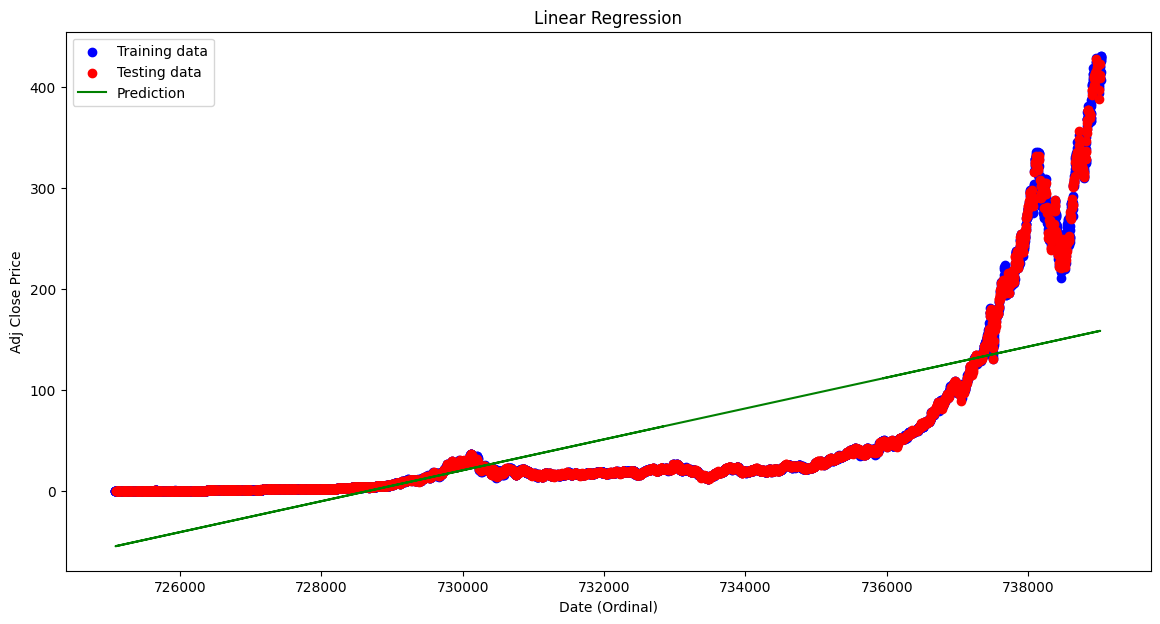

In [480]:
#Linear Regression

#Calculate mean of x and y
X_mean = np.mean(X_train)
Y_mean = np.mean(Y_train)

#Calculate the slope and intercept
slope = np.sum((X_train - X_mean) * (Y_train - Y_mean))/np.sum((X_train - X_mean) ** 2)
intercept = Y_mean - (slope * X_mean)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

#Make predictions
Y_P = slope * X_test + intercept

#Evaluate
test_mse = np.mean((Y_test - Y_P) ** 2)
test_r2 = 1 - (np.sum((Y_test - Y_P) ** 2) / np.sum((Y_test - Y_mean) ** 2))

print(f"Testing MSE: {test_mse}")
print(f"Testing R^2: {test_r2}")

#Visualization
plt.figure(figsize=(14, 7))
plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.scatter(X_test, Y_test, color='red', label='Testing data')
plt.plot(X_test, Y_P, color='green', label='Prediction')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Adj Close Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

[[5.37262612e+11 7.32982000e+05 1.00000000e+00]
 [5.32619717e+11 7.29808000e+05 1.00000000e+00]
 [5.45896367e+11 7.38848000e+05 1.00000000e+00]
 ...
 [5.27635168e+11 7.26385000e+05 1.00000000e+00]
 [5.36693969e+11 7.32594000e+05 1.00000000e+00]
 [5.26232726e+11 7.25419000e+05 1.00000000e+00]]
a: 3.213350315022799e-06
b: -4.689389158764781
c: 1710841.1777268536
Testing MSE: 1568.5803618697978
Testing R^2: 0.7806664231488658


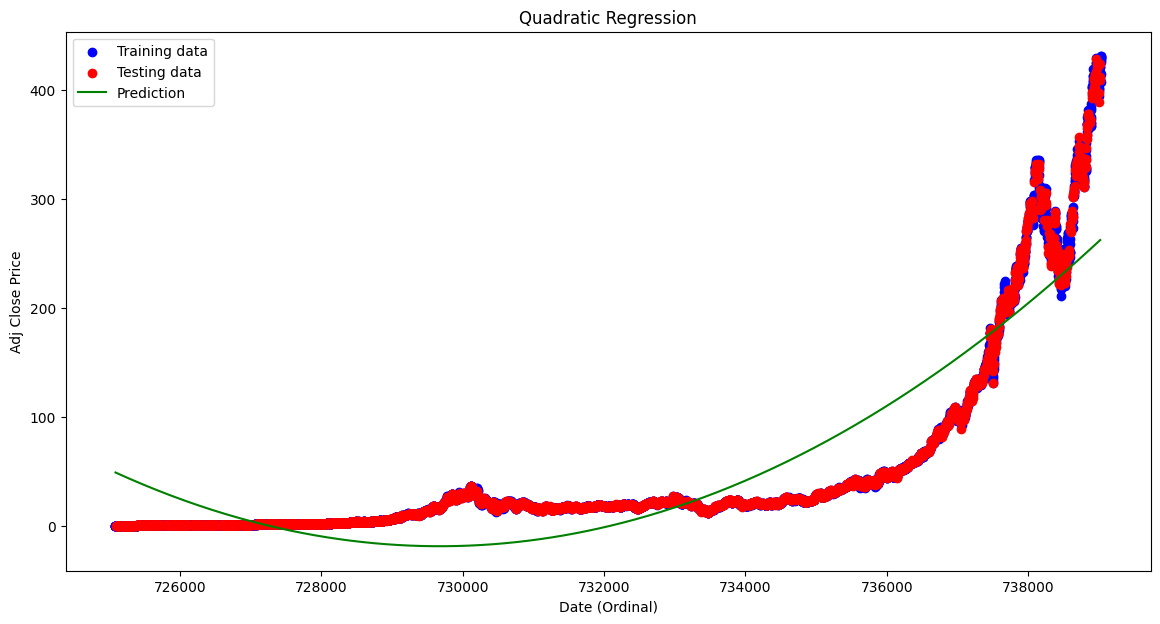

In [481]:
#Quadratic Regression

#Matrix
X_train_matrix = np.vstack([X_train**2, X_train, np.ones(len(X_train))]).T

print(X_train_matrix)

#Compute the coefficients
coefficients = np.linalg.inv(X_train_matrix.T @ X_train_matrix) @ X_train_matrix.T @ Y_train
a, b, c = coefficients

print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")

#Make predictions
Y_P = a * X_test**2 + b * X_test + c

#Evaluate
test_mse = np.mean((Y_test - Y_P) ** 2)
test_r2 = 1 - (np.sum((Y_test - Y_P) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

print(f"Testing MSE: {test_mse}")
print(f"Testing R^2: {test_r2}")

#Visualization
plt.figure(figsize=(14, 7))
plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.scatter(X_test, Y_test, color='red', label='Testing data')
x_range = np.linspace(X_test.min(), X_test.max(), 500)
y_range = a * x_range**2 + b * x_range + c
plt.plot(x_range, y_range, color='green', label='Prediction')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Adj Close Price')
plt.title('Quadratic Regression')
plt.legend()
plt.show()